In [1]:
import numpy as np
#from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

from sklearn.cluster import AffinityPropagation

import pandas as pd


In [2]:
df = pd.read_csv('tracks.csv')                  #read tracks

df.describe()


,danceability,energy,loudness,speechiness,acousticness,liveness,valence
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.647733,0.624000,-7.029500,0.085850,0.229712,0.196973,0.310317
std,0.120653,0.166289,2.811987,0.074014,0.255707,0.155192,0.214515
min,0.428000,0.186000,-16.526000,0.026000,0.000570,0.071100,0.056400
25%,0.566500,0.516000,-8.422750,0.035650,0.010928,0.100250,0.142000
50%,0.644500,0.663500,-6.379000,0.054000,0.180500,0.162500,0.252500
75%,0.716500,0.751750,-5.285250,0.110000,0.318000,0.216250,0.412000
max,0.895000,0.882000,-3.690000,0.311000,0.992000,0.795000,0.840000


[[5.46000000e-01 1.86000000e-01 0.00000000e+00 5.04000000e-02
  9.92000000e-01 1.05000000e-01 5.65000000e-01]
 [7.95000000e-01 5.94000000e-01 8.04456217e-01 7.47000000e-02
  1.11000000e-01 1.62000000e-01 4.09000000e-01]
 [7.12000000e-01 4.81000000e-01 8.65612340e-01 4.87000000e-02
  1.73000000e-01 2.41000000e-01 6.20000000e-02]
 [7.41000000e-01 6.45000000e-01 8.88906201e-01 9.63000000e-02
  1.92000000e-01 1.63000000e-01 4.88000000e-01]
 [4.60000000e-01 6.86000000e-01 8.24088501e-01 3.67000000e-02
  1.46000000e-03 3.75000000e-01 2.52000000e-01]
 [8.34000000e-01 7.30000000e-01 9.98130259e-01 2.22000000e-01
  5.13000000e-03 1.24000000e-01 4.46000000e-01]
 [4.28000000e-01 4.03000000e-01 8.26737301e-01 2.09000000e-01
  2.29000000e-01 2.20000000e-01 1.33000000e-01]
 [4.87000000e-01 7.89000000e-01 1.00000000e+00 4.40000000e-02
  9.47000000e-03 1.89000000e-01 5.64000000e-02]
 [4.87000000e-01 7.89000000e-01 1.00000000e+00 4.40000000e-02
  9.47000000e-03 1.89000000e-01 5.64000000e-02]
 [4.870000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20b26f50>,
      dtype=object)

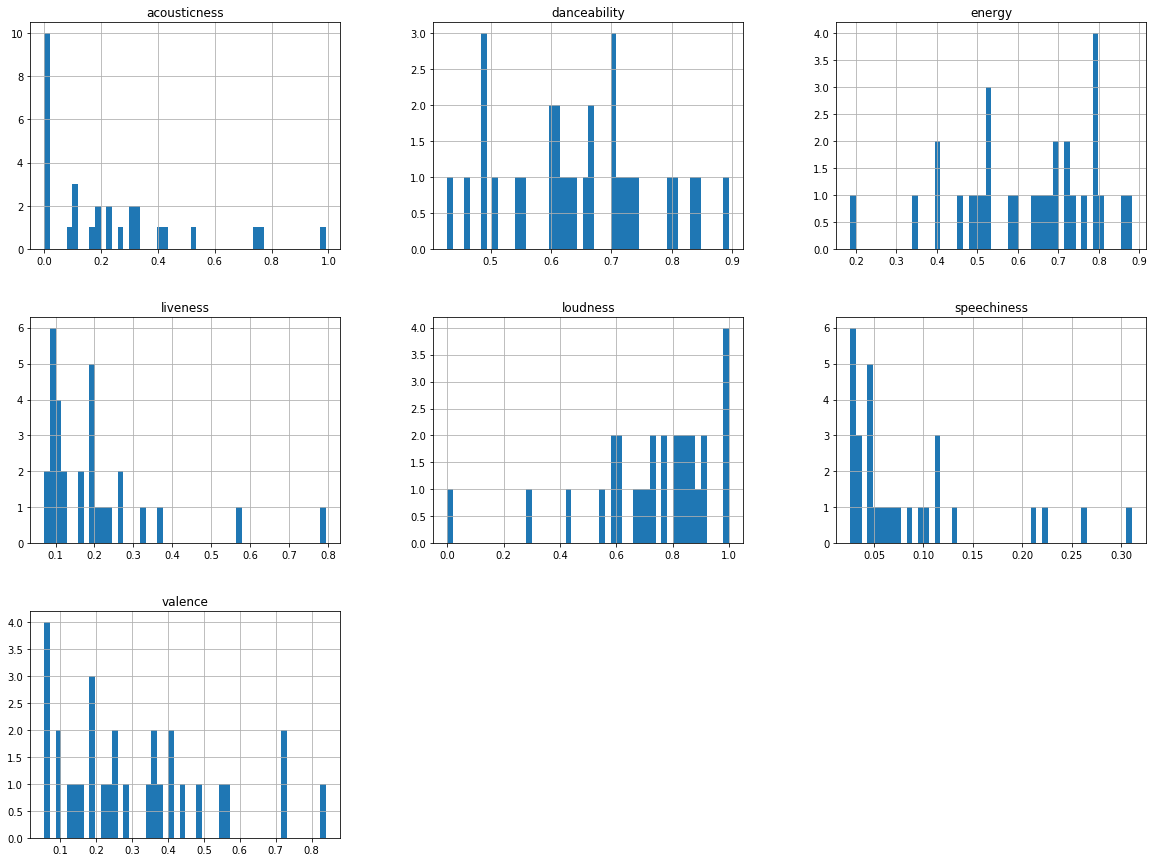

In [15]:
# we need to standardize loudness, to 0-1 scale like rest of data, by using MinMaxScaler
loudness = df[['loudness']].values
standard_loudness = MinMaxScaler().fit_transform(loudness)
df['loudness'] = pd.DataFrame(standard_loudness)         #reassign loudness column




features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
              'liveness', 'valence'] 
x = df.loc[:, features].values                  #x represents the features
                                                #features are individual independent variables that act as the 
                                                #input in system.
df.head()
print(x)
df.hist(bins=50,figsize=(20,15))


In [16]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

In [18]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_

    score = silhouette_score (x, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3813291147679264)
For n_clusters = 3, silhouette score is 0.25217392215029394)
For n_clusters = 4, silhouette score is 0.27247069264846574)
For n_clusters = 5, silhouette score is 0.30318490334813525)
For n_clusters = 6, silhouette score is 0.3086480771513764)
For n_clusters = 7, silhouette score is 0.3114796842810286)
For n_clusters = 8, silhouette score is 0.31011849034800054)
For n_clusters = 9, silhouette score is 0.3055362756835974)
For n_clusters = 10, silhouette score is 0.3173564260600143)
For n_clusters = 11, silhouette score is 0.28215609775773615)
For n_clusters = 12, silhouette score is 0.30052754664669795)
For n_clusters = 13, silhouette score is 0.2790579131555207)
For n_clusters = 14, silhouette score is 0.28923367726618526)


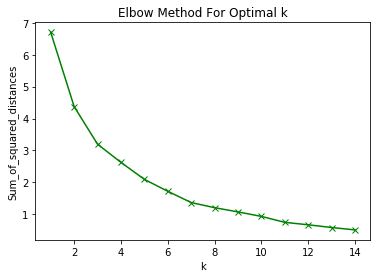

In [19]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()